# DSBA/ITCS/ITIS 6162 - Programming Assignment

### Name:

### Submission instructions

- Enter your name in the space above.
- Save your completed notebook as *dsba6162_**\<uncc username>**.ipynb*.
- Upload **both** the **ipynb** file and the **html** version of your completed notebook to Canvas.

You can download the notebook in html format by:
- In browser, going to *File --> Download as --> HTML*.
- In VSCode, expanding the '...' in the ribbon menu at the top of the file editor. *Export --> HTML*.

***
## Dataset

The dataset for this assignment consists of all tweets between 01/01/2022 and 06/30/2022 containing any of the following keywords (case insensitive):
- uncc
- unccharlotte
- unc charlotte
- ninernation
- niner nation

Stored in *uncc_tweets.csv*.

And the associated user interaction network derived from retweets, mentions, and references between users in the tweets.

Stored as an edgelist in *uncc_graph.edgelist*.

***

# Section I. Topic Modeling on Texts using Latent Semantic Analysis (90 pts)
*TF-IDF, SVD, Normalization, and K-means Clustering*

In this section, you will try to discover a set of topics discussed in a dataset of tweets.

For this task, you will use the *pandas* and *scikit-learn* packages to generate the TF-IDF matrix representing your dataset of texts. You will then apply TruncatedSVD to discover latent concepts in the data and reduce the dimensionality of the data matrix. Finally, you will use K-means clustering to group terms into clusters (topics).

## Part 1 - Load Data and Exploratory Data Analysis (EDA) (20 pts)


#### Part A - Read in tweets dataset

Use the pandas library to read in the provided *uncc_tweets.csv* file.

*Refer to the documentation of read_csv() if you're unsure*.

- Make sure that the date column has the appropriate datatype (converted from string to datetime).
- Make sure to check for and handle any missing values in the dataset.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

tweets = pd.read_csv(
    "uncc_tweets.csv", header = 0,
    parse_dates = ['date']
)
tweets.head(10)

,text,date
0,SamdGreat01 GeographyGIS Assistantships 1 2 3 4,2022-06-30 23:42:40
1,Megastarbasebal 2023 Charlotte Megastars Rotat...,2022-06-30 23:41:10
2,CKatziff Every student should have an equitabl...,2022-06-30 23:26:12
3,I’ve never walked this much outside of when I ...,2022-06-30 23:20:45
4,SamdGreat01 GeographyGIS Assistantships 1 2 3 4,2022-06-30 23:03:33
5,Forecast tomorrow July 1 2022 Scattered Thunde...,2022-06-30 23:01:56
6,Megastarbasebal 2023 Charlotte Megastars Rotat...,2022-06-30 23:00:35
7,ToscaAusten Winback24 gatewaypundit North Caro...,2022-06-30 22:52:35
8,Pac now 10 ACC merger Call it ‘THE COAST’ Coul...,2022-06-30 22:41:09
9,“It is one of only 79 programs in the country ...,2022-06-30 22:40:29


#### Part B - Time series plot

For this part, refer to the pandas *GroupBy* documentation if you are unsure.

1. Group your tweets dataframe by the date.
2. Get the size of each date "group" (i.e. the number of tweets posted each day).
3. Plot the time series of the number of tweets per day. Make sure your plot has appropriate axis labels and title.

*Look in the sklearn documentation for a groupby function that returns the size of each group.*

In [22]:
TweetsGroupedByDates = tweets.groupby('date').size().sort_values(ascending = False)
TweetsByDate = TweetsGroupedByDates.head(40)


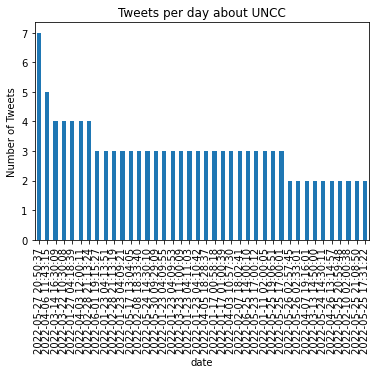

In [24]:
TweetsByDate.plot.bar(
    title = "Tweets per day about UNCC"
)
plt.ylabel("Number of Tweets")
plt.show()

**Question: What day had the maximal number of tweets mentioning UNCC?**

In [25]:
print("May 27, 2022 was the date with the most tweets mentioning UNCC")

May 27, 2022 was the date with the most tweets mentioning UNCC


## Part 2 - TF-IDF Matrix (10 pts)

Create the initial TF-IDF matrix representation of our text dataset.

**Required minimum preprocessing:**
- Lowercase all text
- Remove stop words
- Set a maximum number of terms to include

**Additional preprocessing options:**
- Remove punctuation
- Lemmatize the text
- Use a more expansive stop word list
- Tune the minimum and maximum document frequencies

Python NLP libraries like *spaCy* or *NLTK* can provide additional text preprocessing and lemmatization functions.

*Refer to the scikit-learn documentation regarding initialization parameters*.

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

CountVec = CountVectorizer(
    stop_words = 'english',
    max_features=1000,
    lowercase=True
)

In [48]:
Matrix = CountVec.fit_transform(tweets['text'].values.astype('U'))
print(Matrix.shape)

**Question: How many documents and how many terms are represented in our TF-IDF matrix?**

## Part 3 - Latent Factor Discovery and Dimensionality Reduction (30 pts)

Such a high dimensional matrix is not well-suited for clustering, and individual terms do not make for very informative features. Use sklearn's TruncatedSVD to discover informative latent factors in our data and reduce the dimensionality of the document matrix.

#### Part A - Determine an appropriate number of components

1. Compute the singular value decomposition of the TF-IDF matrix using a (relatively) high number of components.

*Note: Higher numbers of components can take a much longer time to run. For reference, 500 components took ~30s on my computer.*

*To save on some compute, you can use just .fit() for this instead of fit_transform() since we will not be using the transformed matrix from this step.*

2. Plot **at least one** of the following quantities:
    - Singular values
    - Explained variance
    - Explained variance ratio

*Refer to the scikit-learn documentation for TruncatedSVD to see where to find these values.*

**Question: What do you notice about the shape of the curve? In what other context have you seen a similar plot in this course?**

*Optional*: Plot the cumulative sum of the explained variance ratio. This will show you the total percentage of variance of the original matrix (y-axis) that you will capture in the reduced form matrix of size *n* components (x-axis).

*I find this to be a more interpretable version of the same information presented in the previous plot.*

*Hint: Look at the np.cumsum() function.*

3. Choose what you think is an appropriate number of components based on the above plot.

#### Part B - Compute the reduced form of the TF-IDF matrix

Recompute the SVD of the TF-IDF matrix with your selected number of components and transform the result to the reduced dimension matrix.

**Question: What is the total percentage of explained variance of the reduced-dimension matrix?**

*To get the total explained variance percentage of the approximated matrix, compute the sum of explained variance over each individual component in the matrix.*

#### Part C - Unnormalized vs. Normalized, Features vs. Samples

There are many different ways to re-scale or normalize data. Most often, empirical testing is the best way to determine what normalization technique is appropriate for a given application.

- The **Normalizer()** class or **normalize** function provides normalization across *samples* (rows).
- The **StandardScaler()** class provides standardizing across *features* (columns).

Choose *at least one* of the techniques above. Compute a re-scaled version of the data matrix for comparison against the unnormalized version.

## Part 4 - Clustering and Topic Modeling (30 pts)

Cluster the documents using the K-means algorithm, and examine the top terms associated with each cluster.

#### Part A: Determine an appropriate k-value

1. Run k-means for a series of reasonable k-values. Store the sum of squared distances of samples to their closest cluster center (available from the fitted sklearn estimator) for each k-value.
2. Plot the sum of squared distances vs k-value.
3. Determine what you think to be an appropriate value for k.

*To save a little compute, you can set n_init = 1 for the Kmeans estimator for this step.*

*Note: In my testing, the "elbow" curve in this case does not have a very good bend. Just use your best judgement to determine an appropriate k-value.*

#### Part B: Cluster the document matrix

Fit a K-means estimator with your selected number of clusters to the **unnormalized**, reduced-dimension document matrix.

Fit a K-means estimator with your selected number of clusters to the **normalized**, reduced-dimension document matrix.

#### Part C: Cluster analysis

The function below will print out the top *n* words associated with each cluster centroid. The function requires the fitted sklearn estimators for TF-IDF, SVD, and K-means.

Print out the top terms associated with each cluster centroid generated from our data.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans

def get_top_terms_per_cluster(vectorizer: TfidfVectorizer, svd: TruncatedSVD, kmeans: KMeans, n_terms: int = 20):
    original_space_centroids = svd.inverse_transform(kmeans.cluster_centers_)
    cluster_word_indices = original_space_centroids.argsort()[:, :-(n_terms+1):-1]

    terms = vectorizer.get_feature_names_out()

    print('Top terms per cluster:')
    for cluster_num, word_indices in enumerate(cluster_word_indices):
        print(f'Cluster {cluster_num}:')
        for i in word_indices:
            print(f'\t{terms[i]}')
        print()

**Question: Choose three clusters from your results above on the dataset. Based on the top *n* terms, what general topic describes each cluster?**

**Question: How do the clusters differ between the unnormalized and normalized data matrices?**

***

# Section II. Community Detection on Social Networks (60 pts)

*Degree Centrality, PageRank, Community Detection, and Partition Quality*

In this section, you will compute PageRank on a social network to determine the most "influential" nodes in the network. You will also perform community detection to identify clusters (communities) of nodes in the network.

## Part 1: Load data and construct graph (10 pts)

The data are stored in an edgelist file. Use the networkx *read_edgelist()* function to read the file into a networkx Graph object.

Print the total number of nodes and edges in the network.

## Part 2: Degree Centrality and PageRank (20 pts)

*Note: Due to Twitter's TOS, I had to anonymize users in the graph, so we can't go beyond determining the most influential nodes. Generally, we would conduct further analysis to investigate the top nodes returned by these centrality metrics.*

There are many centrality metrics out there for measuring the most "important" nodes in a network. For this analysis, we will use degree centrality and PageRank (akin to eigenvector centrality).

#### Part A: Degree centrality

1. Compute the degree centrality for all nodes in the graph.
2. Print out the top 20 nodes with the highest degree centrality.

#### Part B: PageRank

1. Compute PageRank for all nodes in the graph.
2. Print out the top 20 with the highest PageRank.

**Question: Is the set of top nodes the same for both centrality metrics?**

*Optional: Test a few other centrality metrics or the HITS algorithm. What nodes are the most important based on these metrics?*

## Part 3: Community Detection (30 pts)

Cluster the nodes in the network into communities using a modularity-based approach and a label propagation-based approach. As community detection is an unsupervised problem, one of the major challenges is evaluating the quality of a graph partition generated by a clustering algorithm.

Networkx provides two metrics for measuring the quality of a partition into communities.
- Modularity.
- Partition Quality (a composite of *coverage* and *performance* of a partition).

#### Part A: Greedy modularity maximization

1. Run the greedy modularity community detection algorithm on the network.
2. Compute the **modularity** and **partition quality** for the clustering result.

*Note: This can take several minutes to run. For reference, it took about ~1.5 minutes on my computer.*

Greedy-Mod clustering will return clusters in decreasing size.

3. Plot the size of clusters. (The curve should be a familiar shape).

**Question: How many total clusters did the modularity-based approach produce? What are the sizes of the top 10 clusters?**

#### Part B: Label propagation method

(I would have liked to use the Girvan-Newman method since that is discussed more in the slides, but its scaling is very poor and 10,000 nodes is the upper limit of what's reasonable for that algorithm.)

Another semi-supervised method (used for many things besides community detection) is label propagation. In the label propagation algorithm, each node is initially assigned to a unique community label. At each step in the algorithm, the labels of every node are propagated to their neighbors, and each node's label is updated as the most frequent label of all its neighbors. The algorithm terminates when the labels converge, i.e. no nodes change labels from one iteration to the next.

1. Run the label propagation community detection algorithm on the network.
2. Compute the **modularity** and **partition quality** for the clustering result.

*Note: Label propagation does not return communities in sorted order like greedy mod. You will need to sort the communities by size first.*

3. Plot the size of clusters.

**Question: How many clusters did the label propagation-based approach produce? What are the sizes of the top 10 clusters?**

**Question: Which method produced a node partition with the higher modularity? Which produced the partition with the higher partition quality?**

**Question: Considering both the differences in clustering quality and runtime complexity, which community detection method would you prefer for analysis of large graphs?**